In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
OC_PATH = "observed_catalogs/"
RC_PATH = "random_catalogs/"
FC_PATH = "full_catalogs/"
ML_PATH = "masterlists/"
VE_PATH = "volume_and_excentricity/"

This is how beta and nrand catalogs where created:

In [3]:
RawVoidCats = []

nrand_steps = 5
beta_steps  = 5

beta  = np.linspace(1.2, 2.0, beta_steps)
nrand = np.linspace(1.0, 1.8, nrand_steps)

CounterZero = 60


for i in range(CounterZero,80):
    dataset = np.loadtxt("volume_and_excentricity/{}.vae".format(i), delimiter=",")
    j = i % nrand_steps
    k = (i-CounterZero)//nrand_steps 
    
    RawVoidCats.append([i, beta[j], np.round(nrand[k], decimals=1), dataset])
    print(i, beta[j], nrand[k])

print("\n")
    
    
nrand_steps = 4

beta = 1.0
nrand = np.linspace(1.0, 1.6, nrand_steps)
CounterZero = 50

for i in range(CounterZero, 54):
    dataset = np.loadtxt("volume_and_excentricity/{}.vae".format(i), delimiter=",")
    k = (i - CounterZero) % nrand_steps
    RawVoidCats.append([i, beta, np.round(nrand[k], decimals=1), dataset])
    print(i, beta, np.round(nrand[k], decimals=1) )    

60 1.2 1.0
61 1.4 1.0
62 1.6 1.0
63 1.8 1.0
64 2.0 1.0
65 1.2 1.2
66 1.4 1.2
67 1.6 1.2
68 1.8 1.2
69 2.0 1.2
70 1.2 1.4
71 1.4 1.4
72 1.6 1.4
73 1.8 1.4
74 2.0 1.4
75 1.2 1.6
76 1.4 1.6
77 1.6 1.6
78 1.8 1.6
79 2.0 1.6


50 1.0 1.0
51 1.0 1.2
52 1.0 1.4
53 1.0 1.6


In [14]:
BoxLength = 720
Trim = 30

def TrimCatalog(ellip_cat):    
    halfboxtrim = BoxLength/2 - Trim

    index = np.where( 
            (abs(ellip_cat[:,1]) < halfboxtrim)   & 
            (abs(ellip_cat[:,2]) < halfboxtrim)   & 
            (abs(ellip_cat[:,3]) < halfboxtrim) )
    
    return ellip_cat[index]

def ellipticity(a,b,c):
    return (1/4.)*((a**2 - c**2) / (a**2 + b**2 + c**2))

def prolatness(a,b,c):
    return(1/4.)*( (b**2-c**2)+(b**2 - a**2)) / (a**2 + b**2 + c**2)


## To do the prolate/oblate scatter plot.
def density_estimation(m1, m2, xmin, xmax, ymin, ymax):
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]                                                     
    positions = np.vstack([X.ravel(), Y.ravel()])                                                       
    values = np.vstack([m1, m2])                                                                        
    kernel = scipy.stats.gaussian_kde(values)                                                                 
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z

Volume = (BoxLength - Trim) ** 3
print(Volume)

328509000


In [5]:
VoidCats = []

CountZero = 60
counter   = 0

for i in range(len(RawVoidCats)):
    beta  = RawVoidCats[i][1]
    nrand = RawVoidCats[i][2]
    print(beta, nrand, len(RawVoidCats[i][-1]))
    VoidCats.append([beta, nrand, TrimCatalog(RawVoidCats[i][-1])])

1.2 1.0 10604
1.4 1.0 11676
1.6 1.0 11831
1.8 1.0 11404
2.0 1.0 11198
1.2 1.2 12730
1.4 1.2 13923
1.6 1.2 13839
1.8 1.2 13413
2.0 1.2 12964
1.2 1.4 14527
1.4 1.4 15542
1.6 1.4 15165
1.8 1.4 14507
2.0 1.4 13970
1.2 1.6 15643
1.4 1.6 16338
1.6 1.6 15897
1.8 1.6 15094
2.0 1.6 14540
1.0 1.0 7740
1.0 1.2 10029
1.0 1.4 11705
1.0 1.6 13243


In [6]:
VoidCats[0]

[1.2, 1.0, array([[ 1.00000000e+00, -2.82568195e+02,  1.33915747e+02, ...,
         -3.57713118e-01, -8.25737195e-01,  4.36118573e-01],
        [ 3.00000000e+00, -7.00198526e+01, -3.47117121e+01, ...,
         -2.49129350e-01, -5.80040842e-01,  7.75556051e-01],
        [ 4.00000000e+00, -9.47927720e+00, -7.63619470e+01, ...,
          9.17458504e-01, -1.23496992e-02, -3.97639760e-01],
        ...,
        [ 1.21710000e+04,  1.77392967e+02, -1.53941880e+02, ...,
          6.26582491e-01,  7.51473961e-01, -2.06594453e-01],
        [ 1.21720000e+04,  1.16604369e+01,  1.19834629e+01, ...,
          9.41569418e-01, -3.23753640e-01,  9.29010829e-02],
        [ 1.21740000e+04,  3.25026392e+02,  3.12482652e+02, ...,
         -4.39394890e-01, -8.94485088e-01, -8.26350910e-02]])]

In [7]:
# Sort by nrand
VoidCats.sort(key = lambda x: x[1])
# Sort by beta
VoidCats.sort(key = lambda x: x[0])

In [8]:
for x in VoidCats:
    print(x[0], x[1])

1.0 1.0
1.0 1.2
1.0 1.4
1.0 1.6
1.2 1.0
1.2 1.2
1.2 1.4
1.2 1.6
1.4 1.0
1.4 1.2
1.4 1.4
1.4 1.6
1.6 1.0
1.6 1.2
1.6 1.4
1.6 1.6
1.8 1.0
1.8 1.2
1.8 1.4
1.8 1.6
2.0 1.0
2.0 1.2
2.0 1.4
2.0 1.6


In [9]:
ncats = len(VoidCats)

In [10]:
ncats

24

# Prolatness vs Ellipticity

In [11]:
def plot_prolatness_vs_ellipticity(fig, position, Dataset, xlabel=True, ylabel=True):
    ax = fig.add_subplot(position)

    unity = np.array([0,0.25])

    beta    = Dataset[0]
    nrand   = Dataset[1]
    VoidCat = Dataset[-1]
   

    a = VoidCat[:,6]
    b = VoidCat[:,7]
    c = VoidCat[:,8]
    
    e = ellipticity(a,b,c)
    p = prolatness(a,b,c)
    
    print("beta={:2.1f}, nrand={:2.1f}. \tellipticity, prolatness".format(beta, nrand))
    print(np.percentile(e, [25, 50, 75]), np.percentile(p, [25, 50, 75]))
    xmin, xmax, ymin, ymax =  0, 0.25, -0.25, 0.25
    
    ### Kernel Density begins here.
    X, Y, Z = density_estimation(e, p, xmin, xmax, ymin, ymax)
    ax.imshow(np.rot90(Z), 
                 cmap=plt.cm.terrain_r, 
                 extent=[xmin, xmax, ymin, ymax], 
                 aspect=1)   #aspect='auto'
    #plt.colorbar()
    # Add contour lines
    ax.contour(X, Y, Z, cmap="terrain")       
    ### Kernel Density ends here.
    
    label = r"$\beta={{{:2.1f}}}$".format(beta)
    label += "\n"
    label += r"$n_{\mathrm{rnd} } = $" 
    label += "{:2.1f}".format(nrand)
    ax.text(0.04, 0.17, label)
    ax1.scatter(e,p, s=0.1, label=label)
    #ax1.scatter(0,0, s=0.1, label=label)

    ax.plot(unity,  unity, linestyle="-.", color="k", lw=1)
    ax.plot(unity, -unity, linestyle="-.", color="k", lw=1)
    ax.axhline(0, color="k", lw=1)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    
    if(xlabel): 
        ax.set_xlabel("Ellipticity", fontsize=15)
        ax.xaxis.set_la
    
    if(ylabel): 
        ax.set_ylabel("Prolatness", fontsize=15)
    else:
        ax.set_yticks([-0.2, -0.1, 0.0, 0.1, 0.2])
        ax.set_yticklabels([])
    
    ax.tick_params(axis="x",   top=True, direction="in")
    ax.tick_params(axis="y", right=True, direction="in")
    
    ax.set_xticks([0,0.1,0.2])
    ax.set_xticklabels(["0.0", "0.1", "0.2"])

beta=1.0, nrand=1.0. 	ellipticity, prolatness
[0.08203352 0.10584833 0.13152747] [-0.06834648 -0.03358366 -0.00026233]
beta=1.0, nrand=1.2. 	ellipticity, prolatness
[0.08182516 0.10462091 0.13032824] [-0.06622821 -0.03254581  0.00064033]
beta=1.0, nrand=1.4. 	ellipticity, prolatness
[0.08173284 0.10462503 0.12892121] [-0.06636473 -0.0314291   0.00019712]
beta=1.0, nrand=1.6. 	ellipticity, prolatness
[0.08202913 0.10466649 0.12990195] [-0.06693456 -0.03155258  0.00020941]


beta=1.2, nrand=1.0. 	ellipticity, prolatness
[0.08784245 0.11022001 0.13508453] [-0.06737042 -0.03199389  0.00199469]
beta=1.2, nrand=1.2. 	ellipticity, prolatness
[0.08700536 0.11056425 0.13607549] [-0.0671702  -0.03121828  0.00191913]
beta=1.2, nrand=1.4. 	ellipticity, prolatness
[0.08666719 0.10999022 0.13606248] [-0.06776778 -0.03231829  0.00107253]
beta=1.2, nrand=1.6. 	ellipticity, prolatness
[0.08704399 0.11013996 0.13526504] [-0.0681634  -0.03200888  0.00142157]


beta=1.4, nrand=1.0. 	ellipticity, prolatnes

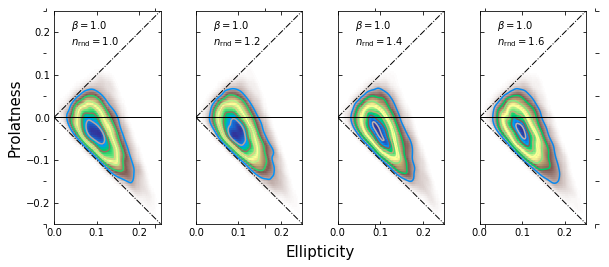

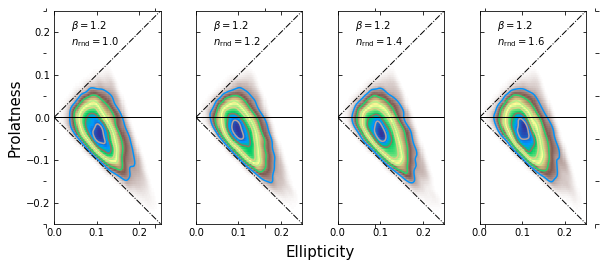

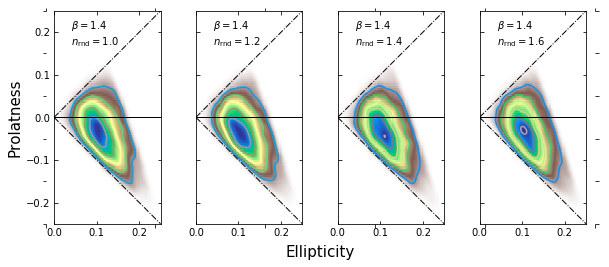

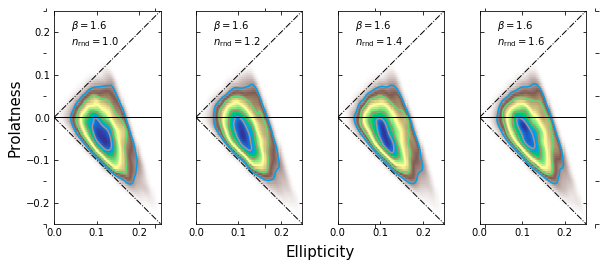

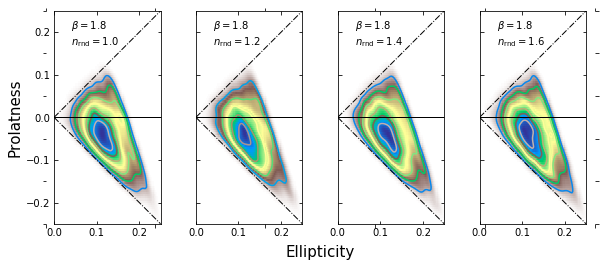

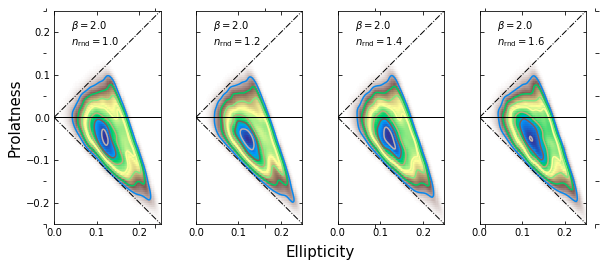

In [47]:
for i in range(6):
    fig = plt.figure(figsize=(9,4))

    ax = fig.add_subplot(111)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
    ax.set_xlabel("Ellipticity", fontsize=15)

    plot_prolatness_vs_ellipticity(fig, 141, VoidCats[i*4 + 0], xlabel=False)
    plot_prolatness_vs_ellipticity(fig, 142, VoidCats[i*4 + 1], ylabel=False, xlabel=False)
    plot_prolatness_vs_ellipticity(fig, 143, VoidCats[i*4 + 2], ylabel=False, xlabel=False)
    plot_prolatness_vs_ellipticity(fig, 144, VoidCats[i*4 + 3], ylabel=False, xlabel=False)
    plt.tight_layout()
    plt.savefig("figures/ellipticity_vs_prolatness_beta_{:2.1f}.pdf".format(VoidCats[i*4][0]))
    
    print("\n")

# Void Size Function

In [53]:
R_cut = 9
def plot_void_size_function(fig, Dataset):
    beta    = Dataset[0]
    nrand   = Dataset[1]
    VoidCat = Dataset[-1]
   
    label = r"$\beta={{{:2.1f}}}$".format(beta)
    label += "\n"
    label += r"$n_{\mathrm{rnd} } = $" 
    label += "{:2.1f}".format(nrand)
    
    
    
    NBINS = 50
    lnR_min = 0.1
    lnR_max = 2.5
    BINS  = np.linspace(lnR_min, lnR_max, NBINS)
    Bin_width = (BINS[1] - BINS[0])

    # Bins Edges array to plot steps.
    X = []
    for h in range(NBINS -1):
        X.extend([BINS[h], BINS[h+1]])
    X = np.array(X)
    
    # Bins centers
    Bins_c = (BINS[:-1] + BINS[1:])/2

    
    
    R = VoidCat[:,5]
    log10R_hist, bin_edges = np.histogram( np.log10(R), bins=BINS)
    log10R_hist = log10R_hist / (Volume * Bin_width)
    
    Y = [log10R_hist[0]]
    for h in range(NBINS - 2):
        Y.extend([log10R_hist[h], log10R_hist[h+1]])
    Y.append(log10R_hist[-1])
    
    
    plt.plot(10**X, Y, label=label)
    
    print("beta={:2.1f}, nrand={:2.1f}, Rmax={:05.2f}".format(beta, nrand, R.max()))
    
    #plt.fill_between(Bins_plt, 1e-12, R_hisplt, label=labels[i], alpha=0.5)

beta=1.0, nrand=1.0, Rmax=71.22
beta=1.0, nrand=1.2, Rmax=69.27
beta=1.0, nrand=1.4, Rmax=85.79
beta=1.0, nrand=1.6, Rmax=96.47


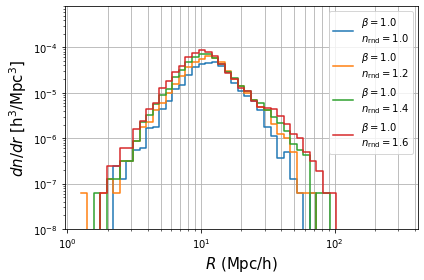

In [64]:
fig   = plt.figure(figsize=(6,4))

for i in range(4):
    plot_void_size_function(fig, VoidCats[i])

#plt.axvline(R_cut, c="k", linewidth=1, linestyle="-.")    
plt.legend(loc=0)    
#plt.xlim(lnR_min, lnR_max)
plt.ylim(1e-8,8e-4)
plt.yscale("log")
plt.xscale("log")
plt.ylabel(r"$ dn / dr \mathrm{\ [h^3 / Mpc^3]}$", fontsize=15)
plt.xlabel(r"$R$ (Mpc/h)", fontsize=15)

plt.grid(True, which="both", axis="x")
plt.grid(True, which="major", axis="y")


plt.tight_layout()

#plt.savefig("figures/void_size_function.pdf")

beta=1.0, nrand=1.0, Rmax=71.22
beta=1.0, nrand=1.2, Rmax=69.27
beta=1.0, nrand=1.4, Rmax=85.79
beta=1.0, nrand=1.6, Rmax=96.47
beta=1.2, nrand=1.0, Rmax=72.76
beta=1.2, nrand=1.2, Rmax=89.17
beta=1.2, nrand=1.4, Rmax=107.00
beta=1.2, nrand=1.6, Rmax=121.19
beta=1.4, nrand=1.0, Rmax=80.77
beta=1.4, nrand=1.2, Rmax=76.58
beta=1.4, nrand=1.4, Rmax=103.75
beta=1.4, nrand=1.6, Rmax=173.62
beta=1.6, nrand=1.0, Rmax=85.01
beta=1.6, nrand=1.2, Rmax=82.70
beta=1.6, nrand=1.4, Rmax=118.74
beta=1.6, nrand=1.6, Rmax=186.07
beta=1.8, nrand=1.0, Rmax=68.69
beta=1.8, nrand=1.2, Rmax=79.10
beta=1.8, nrand=1.4, Rmax=116.95
beta=1.8, nrand=1.6, Rmax=151.42
beta=2.0, nrand=1.0, Rmax=61.01
beta=2.0, nrand=1.2, Rmax=86.66
beta=2.0, nrand=1.4, Rmax=117.14
beta=2.0, nrand=1.6, Rmax=143.96


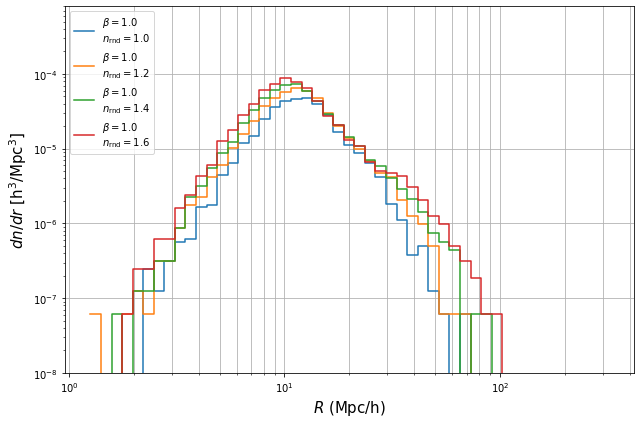

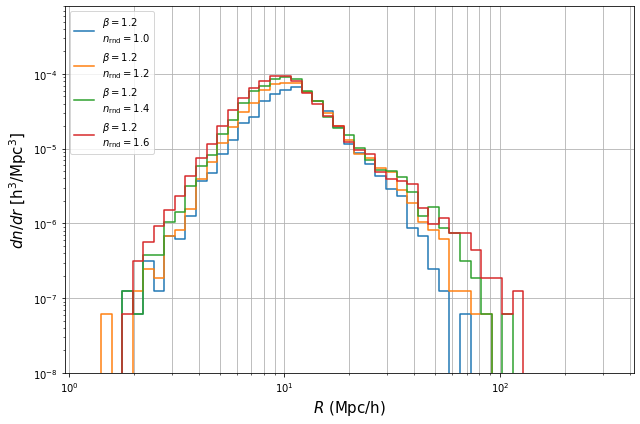

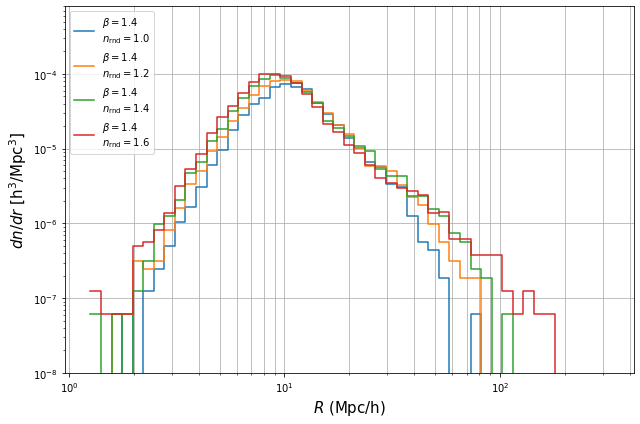

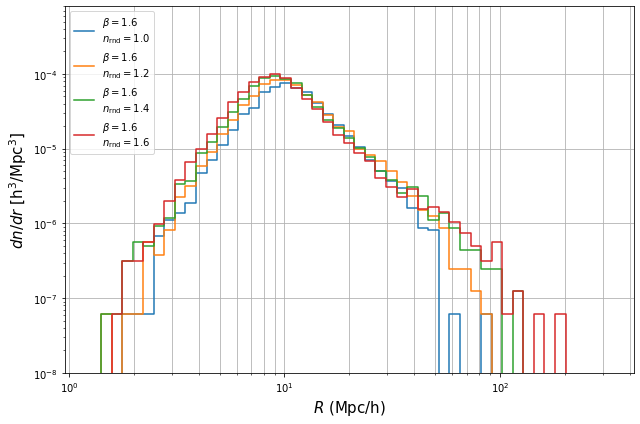

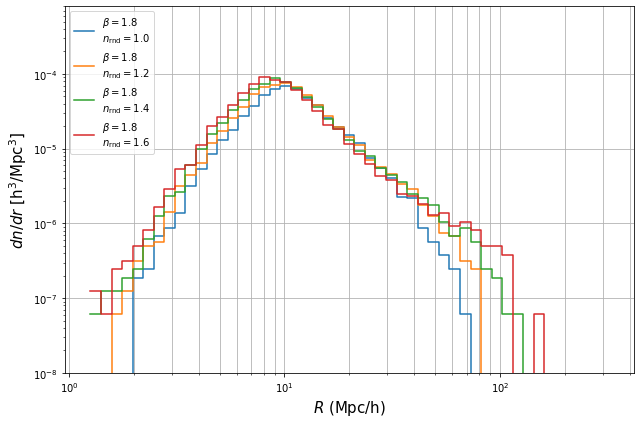

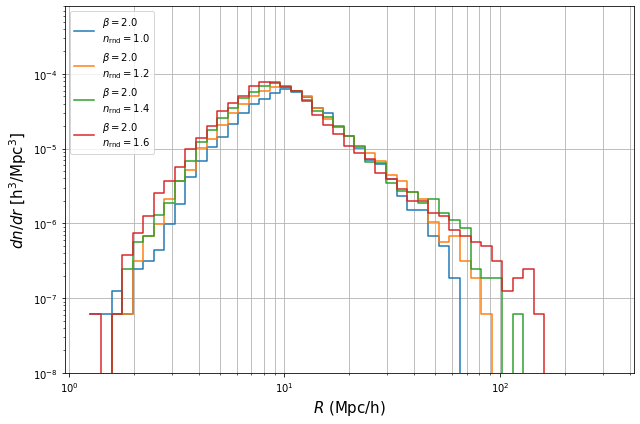

In [65]:
for i in range(6):
    fig = plt.figure(figsize=(9,6))

    plot_void_size_function(fig, VoidCats[i*4 + 0])
    plot_void_size_function(fig, VoidCats[i*4 + 1])
    plot_void_size_function(fig, VoidCats[i*4 + 2])
    plot_void_size_function(fig, VoidCats[i*4 + 3])


    plt.tight_layout()
    
    plt.legend(loc=2)
    plt.ylim(1e-8,8e-4)
    plt.yscale("log")
    plt.xscale("log")
    plt.ylabel(r"$ dn / dr \mathrm{\ [h^3 / Mpc^3]}$", fontsize=15)
    plt.xlabel(r"$R$ (Mpc/h)", fontsize=15)
    
    plt.grid(True, which="both", axis="x")
    plt.grid(True, which="major", axis="y")
    
    plt.tight_layout()

beta=1.0, nrand=1.0, Rmax=71.22
beta=1.2, nrand=1.0, Rmax=72.76
beta=1.4, nrand=1.0, Rmax=80.77
beta=1.6, nrand=1.0, Rmax=85.01
beta=1.8, nrand=1.0, Rmax=68.69
beta=2.0, nrand=1.0, Rmax=61.01
beta=1.0, nrand=1.2, Rmax=69.27
beta=1.2, nrand=1.2, Rmax=89.17
beta=1.4, nrand=1.2, Rmax=76.58
beta=1.6, nrand=1.2, Rmax=82.70
beta=1.8, nrand=1.2, Rmax=79.10
beta=2.0, nrand=1.2, Rmax=86.66
beta=1.0, nrand=1.4, Rmax=85.79
beta=1.2, nrand=1.4, Rmax=107.00
beta=1.4, nrand=1.4, Rmax=103.75
beta=1.6, nrand=1.4, Rmax=118.74
beta=1.8, nrand=1.4, Rmax=116.95
beta=2.0, nrand=1.4, Rmax=117.14
beta=1.0, nrand=1.6, Rmax=96.47
beta=1.2, nrand=1.6, Rmax=121.19
beta=1.4, nrand=1.6, Rmax=173.62
beta=1.6, nrand=1.6, Rmax=186.07
beta=1.8, nrand=1.6, Rmax=151.42
beta=2.0, nrand=1.6, Rmax=143.96


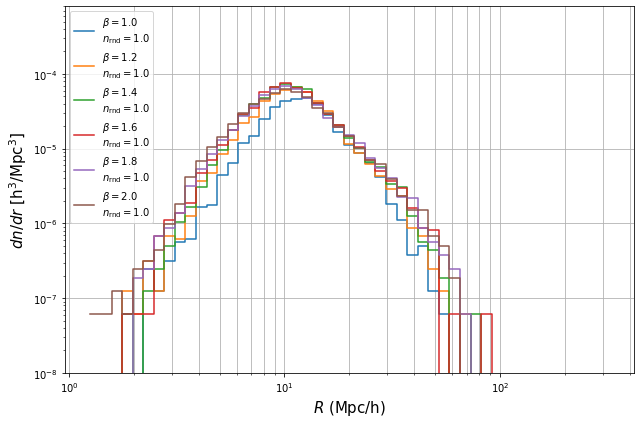

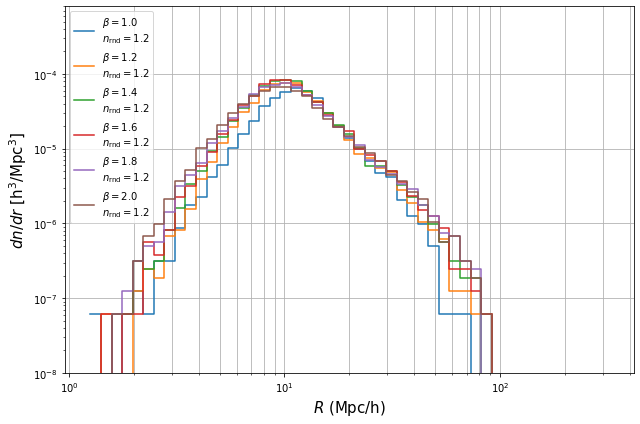

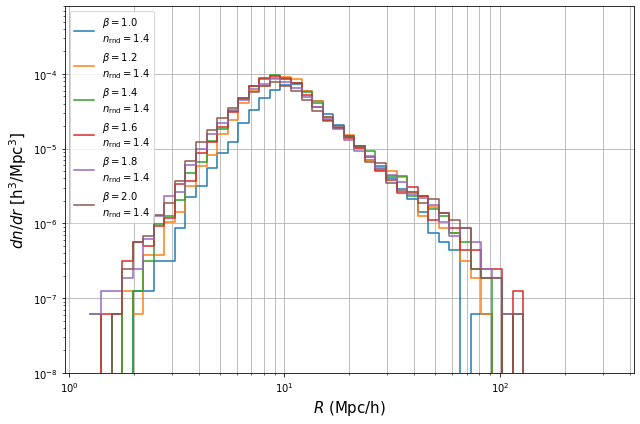

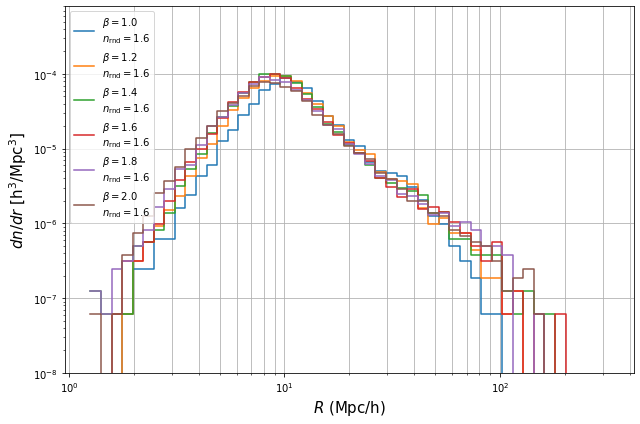

In [66]:
for i in range(4):
    fig = plt.figure(figsize=(9,6))

    for j in range(6):
        plot_void_size_function(fig, VoidCats[(i) + (4*j)])
     


    plt.tight_layout()
    
    plt.legend(loc=2)
    plt.ylim(1e-8,8e-4)
    plt.yscale("log")
    plt.xscale("log")
    plt.ylabel(r"$ dn / dr \mathrm{\ [h^3 / Mpc^3]}$", fontsize=15)
    plt.xlabel(r"$R$ (Mpc/h)", fontsize=15)
    
    plt.grid(True, which="both", axis="x")
    plt.grid(True, which="major", axis="y")

    plt.tight_layout()